# Wolt's 2021 Data Science Internship Assignment

The data contains the order details for the month of August and September, 2020. The attributes of the the data are: 
* TIMESTAMP
* ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES
* ITEM_COUNT
* USER_LAT
* USER_LONG
* VENUE_LAT 
* VENUE_LONG
* ESTIMATED_DELIVERY_MINUTES
* ACTUAL_DELIVERY_MINUTES 
* CLOUD_COVERAGE
* TEMPERATURE
* WIND_SPEED 
* PRECIPITATION

The data gives the information about date and time of the orders, customer and venue location and the weather conditions. I believe that most important part of any delivery system is the time taken for actual delivery. So after analysing the data, I will create a model which will predict the actual delivery time. I am going to approach this as a regression problem.

## Importing necessary libraries and modules.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Getting the dataset.

In [2]:
df=pd.read_csv("orders_autumn_2020.csv")

In [3]:
df.head()

TIMESTAMP  \
0  2020-08-01 06:07:00.000   
1  2020-08-01 06:17:00.000   
2  2020-08-01 06:54:00.000   
3  2020-08-01 07:09:00.000   
4  2020-08-01 07:10:00.000   

   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  ITEM_COUNT  USER_LAT  \
0                                                -19              1    60.158   
1                                                 -7              8    60.163   
2                                                -17              4    60.161   
3                                                 -2              3    60.185   
4                                                 -1              2    60.182   

   USER_LONG  VENUE_LAT  VENUE_LONG  ESTIMATED_DELIVERY_MINUTES  \
0     24.946     60.160      24.946                          29   
1     24.927     60.153      24.910                          39   
2     24.937     60.162      24.939                          23   
3     24.954     60.190      24.911                          28   
4     24.955     60.178      24.949                          27   

   ACTUAL_DELIVERY_MINUTES  CLOUD_COVERAGE  TEMPERATURE  WIND_SPEED  \
0                       10             0.0         15.0     3.53644   
1                       32             0.0         15.0     3.53644   
2                        6             0.0         15.0     3.53644   
3                       26             0.0         16.7     3.52267   
4                       26             0.0         16.7     3.52267   

   PRECIPITATION  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [4]:
df.shape

(18706, 13)

In [5]:
df.columns.to_list()

['TIMESTAMP',
 'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES',
 'ITEM_COUNT',
 'USER_LAT',
 'USER_LONG',
 'VENUE_LAT',
 'VENUE_LONG',
 'ESTIMATED_DELIVERY_MINUTES',
 'ACTUAL_DELIVERY_MINUTES',
 'CLOUD_COVERAGE',
 'TEMPERATURE',
 'WIND_SPEED',
 'PRECIPITATION']

In [6]:
df.isnull().sum()

TIMESTAMP                                                 0
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES      0
ITEM_COUNT                                                0
USER_LAT                                                  0
USER_LONG                                                 0
VENUE_LAT                                                 0
VENUE_LONG                                                0
ESTIMATED_DELIVERY_MINUTES                                0
ACTUAL_DELIVERY_MINUTES                                   0
CLOUD_COVERAGE                                          277
TEMPERATURE                                             277
WIND_SPEED                                              277
PRECIPITATION                                             0
dtype: int64

We see in the above cell that CLOUD_COVERAGE, TEMPERATURE and WIND_SPEED have 277 null values each. We have total 18706 number of records, so dropping 277 won't affect our analysis.

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18429 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18429 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18429 non-null  int64  
 2   ITEM_COUNT                                            18429 non-null  int64  
 3   USER_LAT                                              18429 non-null  float64
 4   USER_LONG                                             18429 non-null  float64
 5   VENUE_LAT                                             18429 non-null  float64
 6   VENUE_LONG                                            18429 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18429 non-null  int64  
 8   ACTUAL_DELIVERY_MINUTES                               18

In [9]:
df.describe().T

count       mean  \
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MI...  18429.0  -1.206522   
ITEM_COUNT                                          18429.0   2.687720   
USER_LAT                                            18429.0  60.175216   
USER_LONG                                           18429.0  24.941208   
VENUE_LAT                                           18429.0  60.175618   
VENUE_LONG                                          18429.0  24.941186   
ESTIMATED_DELIVERY_MINUTES                          18429.0  33.833252   
ACTUAL_DELIVERY_MINUTES                             18429.0  32.626730   
CLOUD_COVERAGE                                      18429.0  11.996853   
TEMPERATURE                                         18429.0  16.973536   
WIND_SPEED                                          18429.0   3.790991   
PRECIPITATION                                       18429.0   0.337757   

                                                          std        min  \
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MI...   8.980479 -41.000000   
ITEM_COUNT                                           1.885533   1.000000   
USER_LAT                                             0.012666  60.153000   
USER_LONG                                            0.016542  24.909000   
VENUE_LAT                                            0.011500  60.149000   
VENUE_LONG                                           0.014490  24.878000   
ESTIMATED_DELIVERY_MINUTES                           7.350066  10.000000   
ACTUAL_DELIVERY_MINUTES                             10.021107   6.000000   
CLOUD_COVERAGE                                      23.812605   0.000000   
TEMPERATURE                                          3.411900   6.100000   
WIND_SPEED                                           1.456017   0.077419   
PRECIPITATION                                        1.136947   0.000000   

                                                         25%       50%  \
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MI...  -7.00000  -2.00000   
ITEM_COUNT                                           1.00000   2.00000   
USER_LAT                                            60.16300  60.17500   
USER_LONG                                           24.92600  24.94300   
VENUE_LAT                                           60.16700  60.17000   
VENUE_LONG                                          24.93000  24.94100   
ESTIMATED_DELIVERY_MINUTES                          29.00000  33.00000   
ACTUAL_DELIVERY_MINUTES                             25.00000  32.00000   
CLOUD_COVERAGE                                       0.00000   0.00000   
TEMPERATURE                                         14.40000  16.70000   
WIND_SPEED                                           2.69619   3.63197   
PRECIPITATION                                        0.00000   0.00000   

                                                         75%        max  
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MI...   5.00000   34.00000  
ITEM_COUNT                                           4.00000   11.00000  
USER_LAT                                            60.18600   60.20100  
USER_LONG                                           24.95400   24.98000  
VENUE_LAT                                           60.18600   60.21900  
VENUE_LONG                                          24.95000   25.04200  
ESTIMATED_DELIVERY_MINUTES                          38.00000   82.00000  
ACTUAL_DELIVERY_MINUTES                             40.00000   58.00000  
CLOUD_COVERAGE                                      25.00000  100.00000  
TEMPERATURE                                         18.90000   26.70000  
WIND_SPEED                                           4.69253    9.85730  
PRECIPITATION                                        0.00000    6.31579

To check the relationship between actual delivery time and the customer-venue distance,
I calculated the distance between the user and the venue location. In the view of analysis based on date, hour and day of week, I created new columns accordingly. 

In [10]:
df['CUS_VENUE_DIST'] = df.apply(lambda r: geodesic((r['USER_LAT'], r['USER_LONG']), (r['VENUE_LAT'], r['VENUE_LONG'])).km, axis=1)

In [11]:
df['DATE'] = pd.to_datetime(df['TIMESTAMP']).dt.date
df['HOUR'] = pd.DatetimeIndex(df['TIMESTAMP']).hour
df['DAY_OF_WEEK'] = pd.DatetimeIndex(df['TIMESTAMP']).dayofweek

In [12]:
df.astype({'DATE': 'datetime64'}).dtypes

TIMESTAMP                                                       object
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES             int64
ITEM_COUNT                                                       int64
USER_LAT                                                       float64
USER_LONG                                                      float64
VENUE_LAT                                                      float64
VENUE_LONG                                                     float64
ESTIMATED_DELIVERY_MINUTES                                       int64
ACTUAL_DELIVERY_MINUTES                                          int64
CLOUD_COVERAGE                                                 float64
TEMPERATURE                                                    float64
WIND_SPEED                                                     float64
PRECIPITATION                                                  float64
CUS_VENUE_DIST                                                 float64
DATE  

Below I drop few of the columns from the main data as I believe they are not required for predicting the actual delivery time.

In [13]:
df.drop(['USER_LAT',
             'USER_LONG',
             'VENUE_LAT',
             'VENUE_LONG',
             'ESTIMATED_DELIVERY_MINUTES',
             'TIMESTAMP', 'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES'], axis=1, inplace=True)

## Daily,  day wise and hourly order analysis

In order to find out if date, day and time have any impact on the number of orders, I plot the below charts. 

In [14]:
datewise_order=df.groupby("DATE").ITEM_COUNT.count().sort_values(ascending=False)
datewise_order.head()

DATE
2020-08-22    460
2020-09-20    414
2020-09-12    401
2020-09-13    400
2020-09-19    398
Name: ITEM_COUNT, dtype: int64

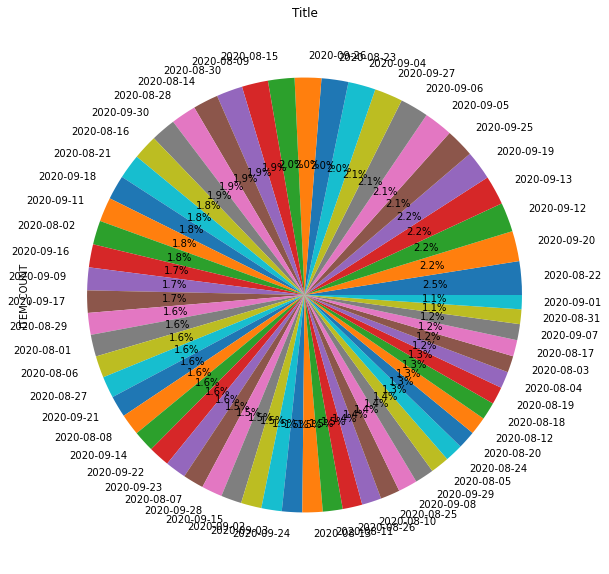

In [15]:
plot = datewise_order.plot.pie(y='ITEM_COUNT', title="Title", legend=False,
                   autopct='%1.1f%%',
                   figsize=(10, 10))

From the pie chart for daily orders, we notice that the maximum number of orders were placed on 22nd August, 2020.
We can say 22nd being Saturday, more people ordered through Wolt. Though the percentage of total number of
order is not that high compared to other dates (~2.5%). 

In [16]:
daywise_order=df.groupby("DAY_OF_WEEK").ITEM_COUNT.count().sort_values(ascending=False)
daywise_order

DAY_OF_WEEK
6    3343
5    3269
4    2745
2    2547
1    2295
0    2253
3    1977
Name: ITEM_COUNT, dtype: int64

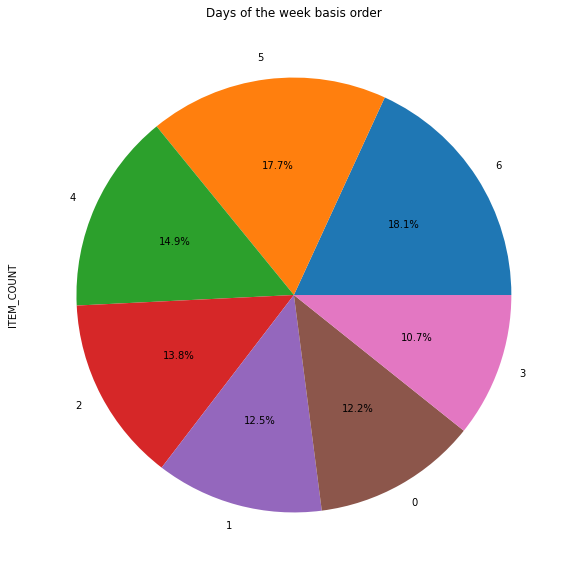

In [17]:
plot = daywise_order.plot.pie(y='ITEM_COUNT', title="Days of the week basis order", legend=False,
                   autopct='%1.1f%%',
                   figsize=(10, 10))

In [18]:
hourly_order=df.groupby("HOUR").ITEM_COUNT.count().sort_values(ascending=False)
hourly_order

HOUR
15    2094
14    1919
16    1880
9     1568
13    1560
17    1497
8     1493
10    1467
11    1322
12    1277
18     904
7      596
19     415
6      194
20      85
5       78
21      72
22       5
4        3
Name: ITEM_COUNT, dtype: int64

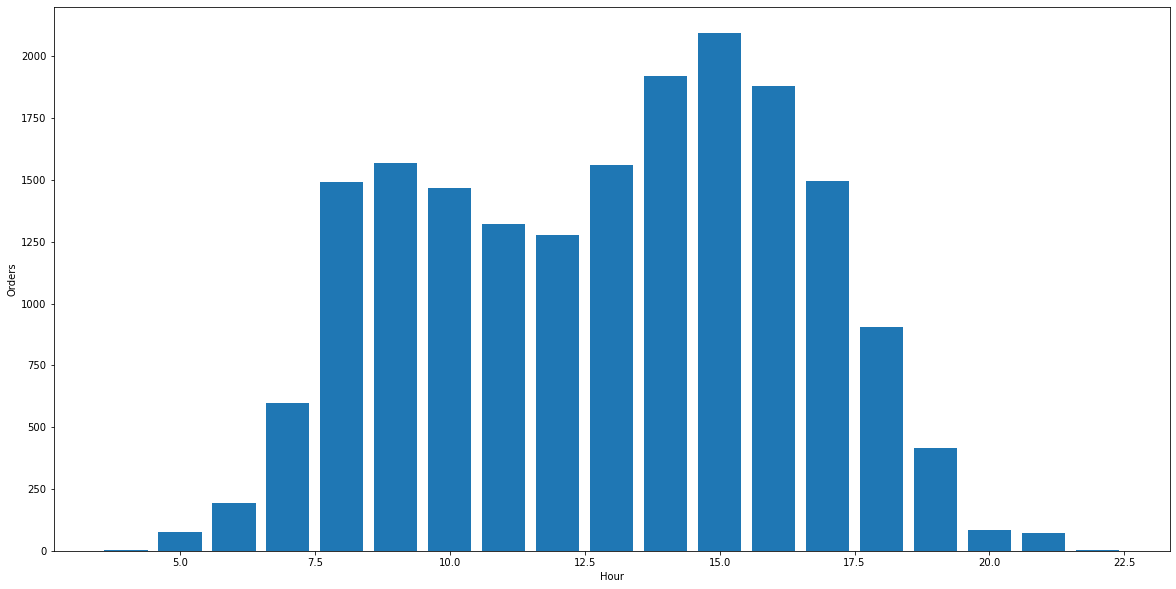

In [19]:
hourly_order=hourly_order.reset_index()

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x=hourly_order['HOUR'],height=hourly_order['ITEM_COUNT'])

ax.set(xlabel="Hour", ylabel="Orders");

We can see "Sunday" is the day when the number of orders is maximum followed by "Saturday". It is clear people have ordered more on weekends. After doing date and day wise analysis, I wanted to check at what time Wolt is getting more orders from the customers. It can be seen from the plot that most orders are done during 1-5 pm.

## Correlation Matrix

To find how the features are correlated with actual delivery minutes, I have shown the correlation matrix below.

In [20]:
import plotly.figure_factory as ff
corr_mat = df.corr()

figure = ff.create_annotated_heatmap(
    z=corr_mat.values,
    x=list(corr_mat.columns),
    y=list(corr_mat.index),
    annotation_text=corr_mat.round(2).values,
    showscale=True)

figure

It can be seen from the correlation matrix that the actual time taken for delivery does not have high correlation
with any of the features. However, the distance between customer and venue location is found to be the
most correlated one.

# Machine Learning Models

I apporached the problem by creating diffrent machine learning models. When we discuss about delivery at doorstep, the first thing we think is how fast it will reach us. So, here I am going to use few models to predict the time is needed for delivery. I started with a linear regression model.

In [21]:
df.head()

ITEM_COUNT  ACTUAL_DELIVERY_MINUTES  CLOUD_COVERAGE  TEMPERATURE  \
0           1                       10             0.0         15.0   
1           8                       32             0.0         15.0   
2           4                        6             0.0         15.0   
3           3                       26             0.0         16.7   
4           2                       26             0.0         16.7   

   WIND_SPEED  PRECIPITATION  CUS_VENUE_DIST        DATE  HOUR  DAY_OF_WEEK  
0     3.53644            0.0        0.222830  2020-08-01     6            5  
1     3.53644            0.0        1.460344  2020-08-01     6            5  
2     3.53644            0.0        0.157311  2020-08-01     6            5  
3     3.52267            0.0        2.449984  2020-08-01     7            5  
4     3.52267            0.0        0.556318  2020-08-01     7            5

In [22]:
X = df.drop(columns=['ACTUAL_DELIVERY_MINUTES','DATE'])
y = df.iloc[:, 1].values

In [23]:
X.shape

(18429, 8)

In [24]:
y.shape

(18429,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lin_reg.predict(X_test)

In [28]:
y_pred

array([30.5216737 , 32.61041597, 36.27294232, ..., 33.11631532,
       28.33143338, 36.11369164])

In [29]:
y_test

array([26, 24, 24, ..., 29, 24, 27])

In [30]:
print("Accuracy of training set: {:.2f}".format(lin_reg.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(lin_reg.score(X_test,y_test)))

Accuracy of training set: 0.11
Accuracy of test set: 0.09


From the linear regression model, the accuracy of training and test sets are found to be 11% and 9% respectively
which is very low accuracy value. So I considered to use a Decision Tree model to approach our problem.

## Decision Tree Model

In [31]:
from sklearn import tree
dt_reg=tree.DecisionTreeRegressor(max_depth=9,random_state=0)
dt_reg=dt_reg.fit(X_train,y_train)
print("Accuracy of training set: {:.2f}".format(dt_reg.score(X_train,y_train)))
print("Accuracy of test set: {:.2f}".format(dt_reg.score(X_test,y_test)))

Accuracy of training set: 0.28
Accuracy of test set: 0.10


As we see decision tree model gives 28% accuracy for training set and 10% for test set,
we know these are not very good accuracy scores. So I believe using regularized methods may overcome the
model complexity and increase the accuracy.

In [32]:
dt_reg.feature_importances_

array([0.05148054, 0.02240949, 0.06998589, 0.08767796, 0.02494992,
       0.39817999, 0.2369468 , 0.10836941])

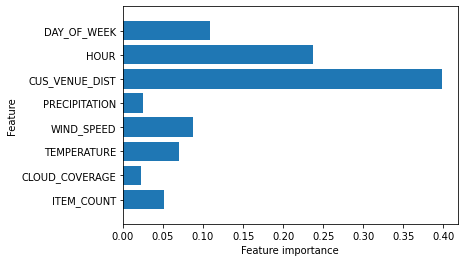

In [33]:
def plot_feature_imp(model):
    n_features=X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_imp(dt_reg)

From above, it is seen that the distance between customer and venue has the highest feature importance
as expected. We see weather condition has less importance in predicting the delivery time.

## Regularized Regression methods.
As we notice the accuracy is very less in case of the linear regression model and decision tree model, I tried to check with regularized machine learning models. Ridge and Lasso regression are the simple techniques which reduce the model complexity. Ridge regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity. Ridge regression enforces the feature coefficients to be lower, but it does not enforce them to be zero. But, Lasso regression can lead to feature selection

### Lasso Regression Model (L1 regularization)

In [34]:
from sklearn import preprocessing

X_lasso= preprocessing.scale(X)
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
   X_lasso, y, test_size=0.3, random_state=0)

In [36]:
lasso_df = pd.DataFrame({'variable': ['ITEM_COUNT','CLOUD_COVERAGE', 'TEMPERATURE',
       'WIND_SPEED', 'PRECIPITATION', 'CUS_VENUE_DIST','HOUR', 'DAY_OF_WEEK']})
lasso_df

variable
0      ITEM_COUNT
1  CLOUD_COVERAGE
2     TEMPERATURE
3      WIND_SPEED
4   PRECIPITATION
5  CUS_VENUE_DIST
6            HOUR
7     DAY_OF_WEEK

In [37]:
for alpha in np.arange(0.0,1.0,0.1):
    # training
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_lasso_train, y_lasso_train)
    col_name =  str(round(alpha, 2))
    lasso_df[col_name] = lasso_reg.coef_

lasso_df

/home/smruti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 582493.4824314986, tolerance: 130.0635358992248



variable       0.0       0.1       0.2       0.3       0.4       0.5  \
0      ITEM_COUNT  0.770537  0.662356  0.558093  0.460140  0.364299  0.268457   
1  CLOUD_COVERAGE  0.319517  0.214065  0.107782  0.000000  0.000000  0.000000   
2     TEMPERATURE  0.976610  0.779551  0.589687  0.436986  0.322917  0.208849   
3      WIND_SPEED  0.384050  0.236534  0.091243  0.000000  0.000000  0.000000   
4   PRECIPITATION  0.661427  0.563901  0.471310  0.375213  0.256393  0.137572   
5  CUS_VENUE_DIST  2.923725  2.821924  2.721729  2.624744  2.527632  2.430520   
6            HOUR -0.038539 -0.000000 -0.000000 -0.000000 -0.000000  0.000000   
7     DAY_OF_WEEK -0.300821 -0.134334 -0.000000 -0.000000 -0.000000 -0.000000   

        0.6       0.7       0.8       0.9  
0  0.172614  0.075969  0.000000  0.000000  
1  0.000000  0.000000  0.000000  0.000000  
2  0.094782  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  
4  0.018752  0.000000  0.000000  0.000000  
5  2.333408  2.236282  2.138815  2.039729  
6  0.000000  0.000000  0.000000  0.000000  
7 -0.000000 -0.000000  0.000000  0.000000

In [38]:
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate')
lasso_df.head()

variable  ITEM_COUNT  CLOUD_COVERAGE  TEMPERATURE  WIND_SPEED  PRECIPITATION  \
estimate                                                                       
0.0         0.770537        0.319517     0.976610    0.384050       0.661427   
0.1         0.662356        0.214065     0.779551    0.236534       0.563901   
0.2         0.558093        0.107782     0.589687    0.091243       0.471310   
0.3         0.460140        0.000000     0.436986    0.000000       0.375213   
0.4         0.364299        0.000000     0.322917    0.000000       0.256393   

variable  CUS_VENUE_DIST      HOUR  DAY_OF_WEEK  
estimate                                         
0.0             2.923725 -0.038539    -0.300821  
0.1             2.821924 -0.000000    -0.134334  
0.2             2.721729 -0.000000    -0.000000  
0.3             2.624744 -0.000000    -0.000000  
0.4             2.527632 -0.000000    -0.000000

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot( lasso_df.ITEM_COUNT, 'indigo',lasso_df.CLOUD_COVERAGE, 'r', lasso_df.TEMPERATURE, 'g', lasso_df.WIND_SPEED, 'b',
        lasso_df.PRECIPITATION, 'y', lasso_df.CUS_VENUE_DIST, 'c', lasso_df.HOUR, 'violet', lasso_df.DAY_OF_WEEK, 'k')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['ITEM_COUNT','CLOUD_COVERAGE', 'TEMPERATURE',
       'WIND_SPEED', 'PRECIPITATION', 'CUS_VENUE_DIST','HOUR', 'DAY_OF_WEEK'])
ax.grid(True)

We know Lasso regression leads to feature selection making the co-efficients of less important features zero faster. Here, we see the co-efficients of cloud coverage, wind speed, hour and day of week become zero quiet soon. The most important feature is found to be the customer-venue distance followed by item count.

### Ridge Regression Model (L2 Regularization)

In [41]:
from sklearn import preprocessing

X_rid = preprocessing.scale(X)
X_rid_train, X_rid_test, y_rid_train, y_rid_test = train_test_split(
   X_rid, y, test_size=0.3, random_state=0)

In [42]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_rid_train, y_rid_train)

Ridge(alpha=0)

In [43]:
ridge_df = pd.DataFrame({'variable': ['ITEM_COUNT','CLOUD_COVERAGE', 'TEMPERATURE',
       'WIND_SPEED', 'PRECIPITATION', 'CUS_VENUE_DIST','HOUR', 'DAY_OF_WEEK']})
ridge_df

variable
0      ITEM_COUNT
1  CLOUD_COVERAGE
2     TEMPERATURE
3      WIND_SPEED
4   PRECIPITATION
5  CUS_VENUE_DIST
6            HOUR
7     DAY_OF_WEEK

In [44]:
for alpha in range(0,10000,200):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_rid_train, y_rid_train)
    col_name = str(alpha)
    ridge_df[col_name] = ridge_reg.coef_

ridge_df

variable         0       200       400       600       800      1000  \
0      ITEM_COUNT  0.770537  0.759200  0.748203  0.737531  0.727169  0.717103   
1  CLOUD_COVERAGE  0.319517  0.313196  0.307121  0.301278  0.295652  0.290233   
2     TEMPERATURE  0.976610  0.954522  0.933452  0.913329  0.894089  0.875673   
3      WIND_SPEED  0.384050  0.373403  0.363360  0.353871  0.344892  0.336381   
4   PRECIPITATION  0.661427  0.650362  0.639649  0.629271  0.619217  0.609470   
5  CUS_VENUE_DIST  2.923725  2.879386  2.836379  2.794646  2.754129  2.714777   
6            HOUR -0.038539 -0.036521 -0.034575 -0.032698 -0.030891 -0.029150   
7     DAY_OF_WEEK -0.300821 -0.288919 -0.277694 -0.267095 -0.257075 -0.247591   

       1200      1400      1600  ...      8000      8200      8400      8600  \
0  0.707321  0.697810  0.688558  ...  0.484608  0.480186  0.475844  0.471582   
1  0.285009  0.279970  0.275105  ...  0.176695  0.174738  0.172824  0.170951   
2  0.858029  0.841106  0.824862  ...  0.512773  0.506840  0.501045  0.495383   
3  0.328304  0.320627  0.313321  ...  0.184116  0.181843  0.179628  0.177470   
4  0.600020  0.590853  0.581957  ...  0.392576  0.388630  0.384762  0.380971   
5  2.676538  2.639367  2.603219  ...  1.810725  1.793676  1.776945  1.760525   
6 -0.027476 -0.025864 -0.024314  ...  0.003438  0.003873  0.004293  0.004697   
7 -0.238605 -0.230082 -0.221990  ... -0.086870 -0.084745 -0.082689 -0.080698   

       8800      9000      9200      9400      9600      9800  
0  0.467396  0.463284  0.459245  0.455276  0.451376  0.447542  
1  0.169118  0.167324  0.165567  0.163847  0.162161  0.160510  
2  0.489850  0.484441  0.479152  0.473979  0.468919  0.463966  
3  0.175366  0.173314  0.171311  0.169357  0.167450  0.165587  
4  0.377255  0.373611  0.370037  0.366532  0.363092  0.359717  
5  1.744405  1.728579  1.713037  1.697773  1.682779  1.668048  
6  0.005087  0.005462  0.005825  0.006174  0.006511  0.006836  
7 -0.078769 -0.076901 -0.075090 -0.073335 -0.071633 -0.069982  

[8 rows x 51 columns]

In [45]:
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate')
ridge_df.head()

variable  ITEM_COUNT  CLOUD_COVERAGE  TEMPERATURE  WIND_SPEED  PRECIPITATION  \
estimate                                                                       
0           0.770537        0.319517     0.976610    0.384050       0.661427   
200         0.759200        0.313196     0.954522    0.373403       0.650362   
400         0.748203        0.307121     0.933452    0.363360       0.639649   
600         0.737531        0.301278     0.913329    0.353871       0.629271   
800         0.727169        0.295652     0.894089    0.344892       0.619217   

variable  CUS_VENUE_DIST      HOUR  DAY_OF_WEEK  
estimate                                         
0               2.923725 -0.038539    -0.300821  
200             2.879386 -0.036521    -0.288919  
400             2.836379 -0.034575    -0.277694  
600             2.794646 -0.032698    -0.267095  
800             2.754129 -0.030891    -0.257075

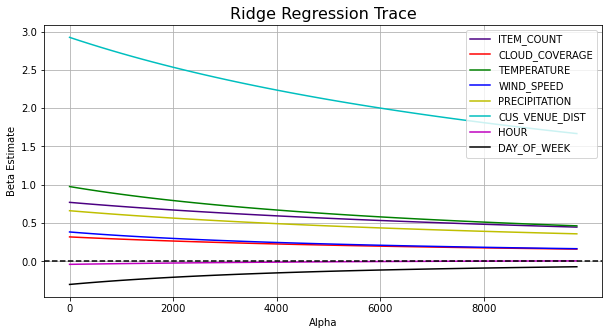

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.ITEM_COUNT, 'indigo',ridge_df.CLOUD_COVERAGE, 'r', ridge_df.TEMPERATURE, 'g', 
        ridge_df.WIND_SPEED, 'b',ridge_df.PRECIPITATION, 'y', ridge_df.CUS_VENUE_DIST, 'c', ridge_df.HOUR, 'm',
        ridge_df.DAY_OF_WEEK, 'k')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['ITEM_COUNT','CLOUD_COVERAGE', 'TEMPERATURE',
       'WIND_SPEED', 'PRECIPITATION', 'CUS_VENUE_DIST','HOUR', 'DAY_OF_WEEK'])
plt.xticks(np.arange(0, 50, 10.0))

ax.grid(True)

After trying various alpha values, finally I could get the conclusion from ridge regrssion model. It's pretty
clear that the customer-venue distance is the most important feature.

# Conclusion

The above analysis and model prediction show the distance between customer and venue is 
the most important feature to determine the actual time taken for delivery. Though it is obvious
but still it depends on the road condition and traffic on the road which are not included in our data.
Moreover, the data given is for the month of August and September when the driving conditions are good. However,
this would not be favourable during extreme weather where it might affect delivery time adversely.

# Future Work

The performance of the existing model can be improved by considering following factors:
* Changing the alpha value
* Using hyper parameter tuning
* Cross-validation